In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax
import get_initialization_cond as init
import optimization_SPDC as opt
import jaxopt
import jax.scipy.optimize as optimize
import numpy as np

key = jax.random.PRNGKey(0)

In [11]:
Np = 0.01
# higher N and wf+wi makes less unstable pump... need to see if N or wf+wi influences more
N = 1001
wi = -10
wf = 10
x = jnp.linspace(wi, wf, N)
freq_range_pump = jnp.linspace(2*wi, 2*wf, 2*N)
freq_range_pump_complex = jnp.concatenate((freq_range_pump, freq_range_pump)).reshape(4*N,)
vp = 0.1
l = 1
# For an unstable pump, just change amplitude to 0.2 and width to 0.2 at N = 1
hermite_init_params = [2, 0.05, 0.3, jnp.pi/5]
cst_init_params = [0.1]
alpha, G, H = init.get_constants(vp, l, wi, wf, Np, N = N)
# get the initialization seeds
initial_value_gauss = jnp.array([0.5, 1., 2*jnp.pi/7])
arbitrary_seed_hermite = init.get_initialization_array(hermite_init_params, vp, l, wi, wf, Np, method='hermite', N = N)
random_seed = 0.01*jax.random.uniform(key, shape=(4*N,))
phi = 2*jnp.pi*jax.random.uniform(key)
y_N = 5

In [18]:
solver_K = jaxopt.BFGS(opt.get_loss_K, maxiter=5, verbose=1)
solver_N = jaxopt.BFGS(opt.get_loss_N, maxiter=20, verbose=1)   
solver = jaxopt.BFGS(opt.get_penalty_loss, maxiter=10, verbose=1) 

In [15]:
# Penalty method
pump = random_seed.copy()
for i in range(5):
    print(str(i) + " th loop")
    (pump, state) = solver.run(pump, N, alpha, G, H, l, y_N, freq_range_pump_complex, 10**i)

0 th loop
error: 104.65003
error: 92.84024
error: 42.194263
error: 15.255187
error: 5.136935
error: 9.7400055
error: 2.5141623
error: 309.37845
error: 118.01554
1 th loop
error: 134.98128
error: 48.168274
error: 11.745168
error: 1.8143145
error: 3026.821
error: 1190.1125
error: 471.0022
error: 185.71294
error: 70.592896
2 th loop
error: 35.180275
error: 3.5726643
error: 154.33827
error: 59.731873
error: 16.576881
error: 1.2514237
error: 28634.783
error: 11341.567
error: 4536.7256
3 th loop
error: 7421.4985
error: 3040.4214
error: 1248.6989
error: 509.65082
error: 201.4047
error: 70.21801
error: 13.089161
error: 6.4841576
error: 297.0752
4 th loop
error: 316.14877
error: 107.886185
error: 17.029873
error: 62.90595
error: 3.157687
error: 54809.836
error: 22539.14
error: 9315.345
error: 3861.1807


In [13]:
pump = random_seed.copy()
for i in range(5):
    print("Loop " + str(i) + " for N")
    (pump, state) = solver_N.run(pump, N, alpha, G, H, l, y_N)
    print("Loop " + str(i) + " for K")
    (pump, state) = solver_K.run(pump, N, alpha, G, H, l, freq_range_pump_complex)

Loop 0 for N
error: 0.22356407
error: 0.36202195
error: 0.58553135
error: 0.9426012
error: 1.4967784
error: 2.2869756
error: 3.116686
error: 2.796714
error: 1.5321015
Loop 0 for K
error: 2.4968643
error: 1.7284104
Loop 1 for N
error: 94.972176
error: 35.888317
error: 14.30677
error: 6.1047487
error: 2.770882
error: 1.3127767
error: 0.6379487
error: 0.314325
error: 0.15599592
Loop 1 for K
error: 2.039827
error: 0.84657025
Loop 2 for N
error: 185.31078
error: 71.28902
error: 28.552347
error: 12.036307
error: 5.351798
error: 2.4887767
error: 1.1941986
error: 0.5840484
error: 0.28868875
Loop 2 for K
error: 1.2506467
error: 0.54280084
Loop 3 for N
error: 93.150246
error: 37.534184
error: 15.872442
error: 7.058571
error: 3.2777941
error: 1.5703107
error: 0.7671238
error: 0.37892586
error: 0.1882856
Loop 3 for K
error: 0.7766894
error: 0.4493549
Loop 4 for N
error: 48.319324
error: 20.36324
error: 9.015647
error: 4.169212
error: 1.9912567
error: 0.97087437
error: 0.47903094
error: 0.2378838
e

(DeviceArray(5.1967206, dtype=float32), DeviceArray(2.0911884, dtype=float32))

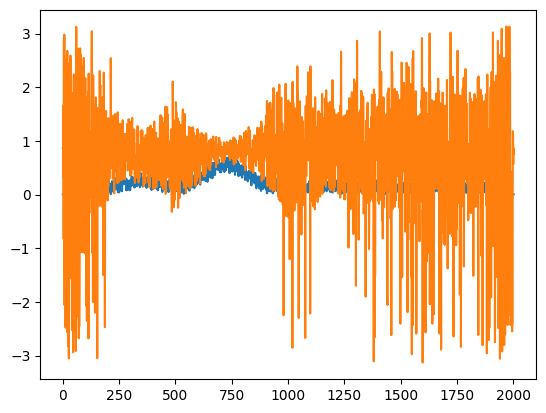

In [16]:
plt.plot(jnp.abs(opt.get_complex_array(pump)))
plt.plot(jnp.angle(opt.get_complex_array(pump)))
opt.get_observables(pump, N, alpha, G, H, l)

(DeviceArray(5.000048, dtype=float32), DeviceArray(1.2693273, dtype=float32))

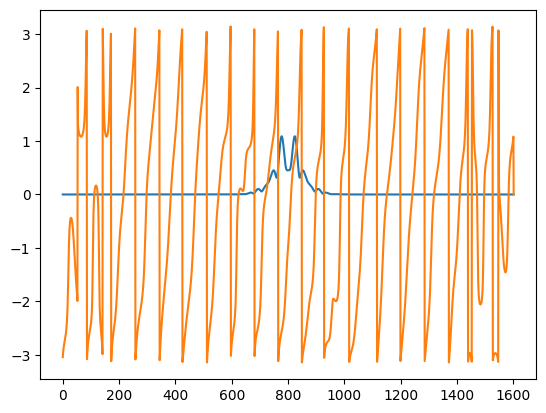

In [26]:
plt.plot(jnp.abs(opt.get_complex_array(pump)))
plt.plot(jnp.angle(opt.get_complex_array(pump)))
opt.get_observables(pump, N, alpha, G, H, l)

In [19]:
opt.get_loss_N(arbitrary_seed_hermite_order_1, N, alpha, G, H, l, y_N)

DeviceArray(1.5572517, dtype=float32)

In [7]:
# first attempt


DeviceArray(2.6292431, dtype=float32)

In [ ]:
# Try get a hang of using Greens function
